In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

hls = xr.open_dataset(r"C:\Users\konst\Documents\Hiwi\mw3\master_thesis\data\satellite_data\hls_eifel\HLS_Monthly_Medians_2013-04_2025-01.nc")

In [2]:
na_percent = hls["B1"].notnull().mean(dim=[d for d in hls["B1"].dims if d != 'time'])*100

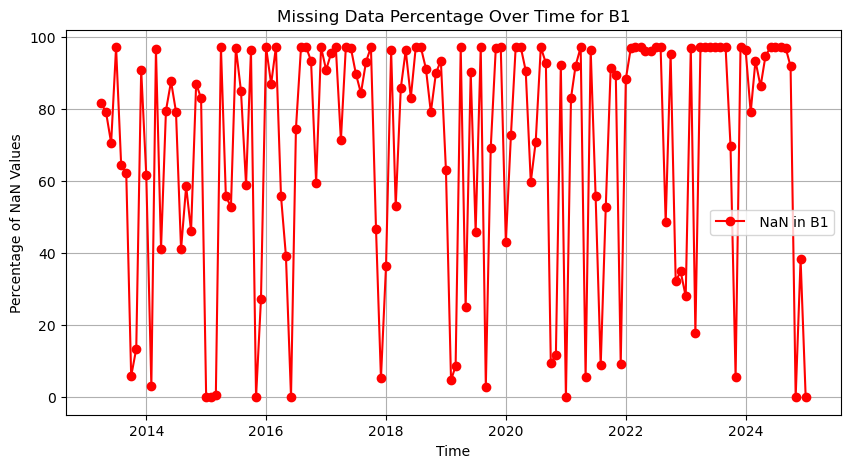

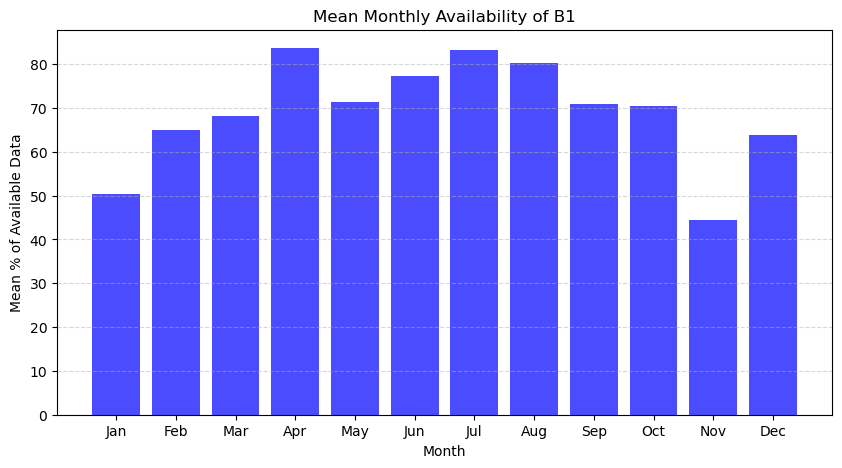

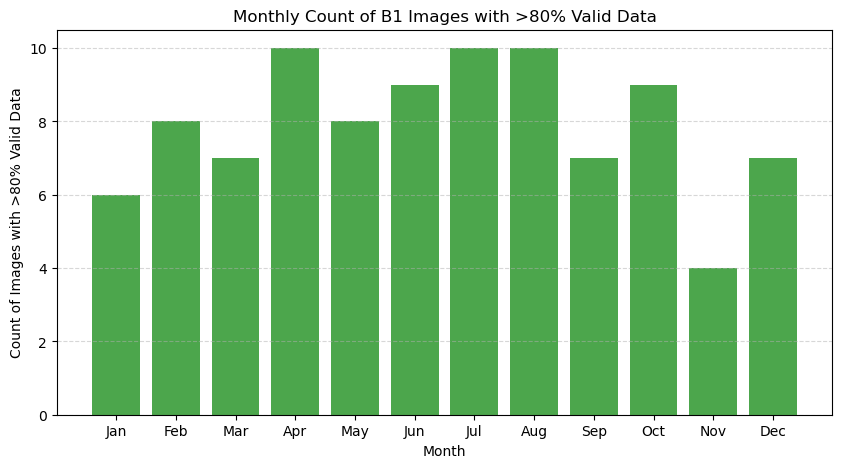

In [3]:
# Plot the percentage of missing values over time
plt.figure(figsize=(10, 5))
plt.plot(hls["time"], na_percent, marker="o", linestyle="-", color="red", label=" NaN in B1")
plt.xlabel("Time")
plt.ylabel("Percentage of NaN Values")
plt.title(f"Missing Data Percentage Over Time for B1")
plt.legend()
plt.grid(True)
plt.show()

# Group by month and compute the mean percentage of valid data
monthly_valid_percent = na_percent.groupby("time.month").mean()

# Plot the monthly mean percentage of available data
plt.figure(figsize=(10, 5))
plt.bar(monthly_valid_percent.month, monthly_valid_percent, color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Mean % of Available Data")
plt.title(f"Mean Monthly Availability of B1")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Filter time steps where valid data is greater than 80%
valid_above_80 = na_percent > 60

# Count occurrences per month
monthly_counts = valid_above_80.groupby("time.month").sum()

# Plot the count of images per month with >80% valid data
plt.figure(figsize=(10, 5))
plt.bar(monthly_counts.month, monthly_counts, color="green", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Count of Images with >80% Valid Data")
plt.title(f"Monthly Count of B1 Images with >80% Valid Data")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()